# Final Project
The following task for stock analysis are conducted in this notebook which are as below:
1. All the News from prnewswire website is parsed and stored in the dataframe  
2. Fetching stock symbols from all the news which have stock symbol in it
3. Fetching headline, company name and current price using beautifulsoup from yahoo finance
4. Fetching stock price and volume for last 5 days using pandas datareader from yahoo finance
5. Visualization of the stock price and volume

Note: The data is fetched from the newswire website and by default page has 25 news at a time, therefore program will be based on looking for the stock symbol in those news. Also, url is provided in the program therefore the program is dynamic and will present result accordingly when program runs at a particular time.

In [2]:
#importing necessary libraries
import requests
import bs4
from bs4 import BeautifulSoup

import pandas as pd
from datetime import datetime, timedelta,date

## 1. Parsing news from newswire website

In [399]:
#Storing URL
url='https://www.prnewswire.com/news-releases/news-releases-list/'

In [400]:
#providing user agent
headers={
    'User-Agent':"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36 Edg/86.0.622.69"
}

In [401]:
#Requesting and parsing URL
r=requests.get(url,{'headers':headers})
soup=bs4.BeautifulSoup(r.text,'html.parser')

In [402]:
#Fetching all the articles from the website
i=0
news_headline=[]
time=[]
num_of_articles=len(soup.find_all('a',class_='news-release'))
while i<num_of_articles:
    #print(i+1,": ",soup.find_all('a',class_='news-release')[i].text)
    news_headline.append(soup.find_all('a',class_='news-release')[i].text)
    time.append(soup.find_all('h3')[i].find('small').text)
    i+=1

In [403]:
#Creating a list of url for articles
urls=[]
i=0
#num_of_articles=len(soup.find_all('a',class_='news-release'))
for i in range(num_of_articles):
    urls.append(soup.find_all('a',class_='news-release')[i].get('href'))

#### Storing the news in dataframe
To keep track of all the news, news dataframe is created and URL of the website, Time at which news was published and news headline are stored in this dataframe.

In [404]:
#Creating DataFrame with column name URL, Time and News Headline
news = pd.DataFrame(list(zip(urls,time, news_headline)), columns =['URL','Time', 'News Headline'])
news

,URL,Time,News Headline
0,/news-releases/cme-group-chief-financial-offic...,17:36 ET,CME Group Chief Financial Officer and Global H...
1,/news-releases/hexnodes-first-global-user-conf...,17:31 ET,"Hexnode's First Global User Conference, HexCon..."
2,/news-releases/3-1-billion-worldwide-precision...,17:30 ET,$3.1 Billion Worldwide Precision Irrigation In...
3,/news-releases/small-denver-company-is-making-...,17:28 ET,Small Denver Company is Making a Big Impact on...
4,/news-releases/global-credit-outlook-2021-covi...,17:25 ET,Global Credit Outlook 2021: COVID-19 Will Trig...
5,/news-releases/mack-cali-announces-61-million-...,17:25 ET,Mack-Cali Announces $61 Million Sale of 581 Ma...
6,/news-releases/esg-industry-report-card-publis...,17:25 ET,ESG Industry Report Card Published On Financia...
7,/news-releases/report-georgia-video-game-indus...,17:25 ET,Report: Georgia Video Game Industry Generates ...
8,/news-releases/report-florida-ranks-4-in-natio...,17:20 ET,Report: Florida Ranks #4 in Nation for Economi...
9,/news-releases/vanguard-announces-senior-leade...,17:19 ET,Vanguard Announces Senior Leadership Changes


## 2. Fetching Stock Symbols

In [405]:
#Only fetching urls who have stock symbol in their content
stock_companies_url=[]
headline=[]
time=[]
for i in range(num_of_articles):
    article_url=f'https://www.prnewswire.com/{urls[i]}'
    print(article_url)
    r=requests.get(article_url,{'headers':headers})
    soup=bs4.BeautifulSoup(r.text,'html.parser')
    #y=soup.find('h1')
    x=soup.find('a',class_='ticket-symbol')
    print(x)
    if soup.find('a',class_='ticket-symbol')!=None:
        stock_companies_url.append(article_url)
        headline.append(soup.find('h1').text)
        time.append(soup.find('p',class_='mb-no').text)
print("----------------------------------------------------------")
print("URLs who have stock symbols")
print(stock_companies_url)

https://www.prnewswire.com//news-releases/cme-group-chief-financial-officer-and-global-head-of-financial-and-otc-products-to-present-at-goldman-sachs-2020-us-financial-services-conference-301186218.html
None
https://www.prnewswire.com//news-releases/hexnodes-first-global-user-conference-hexcon20-successfully-closes-301186215.html
None
https://www.prnewswire.com//news-releases/3-1-billion-worldwide-precision-irrigation-industry-to-2027---impact-of-covid-19-on-the-market-301185957.html
None
https://www.prnewswire.com//news-releases/small-denver-company-is-making-a-big-impact-on-local-governments-across-the-us-and-canada-301186216.html
None
https://www.prnewswire.com//news-releases/global-credit-outlook-2021-covid-19-will-trigger-more-downgrades-report-says-301186214.html
None
https://www.prnewswire.com//news-releases/mack-cali-announces-61-million-sale-of-581-main-street-in-woodbridge-township-nj-301186213.html
<a class="ticket-symbol" data-toggle="modal" href="#financial-modal">CLI</a>


In [406]:
#Fetching Stock Symbol
stock_symbols=[]
for i in stock_companies_url:
    #print(i)
    r=requests.get(i,{'headers':headers})
    soup=bs4.BeautifulSoup(r.text,'html.parser')
    x=soup.find('a',class_='ticket-symbol').text
    stock_symbols.append(x)
print(stock_symbols)

['CLI', 'SJM', 'PBA', 'CCL', 'THG']


Sometimes, multiple news might have same symbol but their stock price would be almost similar. Therefore, to avoid that situation only one symbol will be kept and other same symbols would be removed to eliminate duplication of the data.

In [407]:
#Removing repeated symbols to eliminate duplication of the data 
stock_symbols = list(dict.fromkeys(stock_symbols))
print(stock_symbols)

['CLI', 'SJM', 'PBA', 'CCL', 'THG']


In [408]:
#If by any means stock symbol is not capture for the scraped line of code then below code will remove the empty string
stock_symbols= list(filter(None, stock_symbols))

The new dataframe df is created to store the URLs of the news who have stock symbols and the time will be when the news are published on the newswire website.

In [409]:
#Creating DataFrame
df = pd.DataFrame(list(zip(stock_companies_url, headline,time, stock_symbols)), columns =['URL','News Headline','Time', 'Stock Symbol'])
df

,URL,News Headline,Time,Stock Symbol
0,https://www.prnewswire.com//news-releases/mack...,Mack-Cali Announces $61 Million Sale of 581 Ma...,"Dec 03, 2020, 17:25 ET",CLI
1,https://www.prnewswire.com//news-releases/the-...,The J.M. Smucker Co. to Divest its Natural Bal...,"Dec 03, 2020, 17:01 ET",SJM
2,https://www.prnewswire.com//news-releases/pemb...,Pembina Pipeline Corporation Releases 2020 Sus...,"Dec 03, 2020, 17:00 ET",PBA
3,https://www.prnewswire.com//news-releases/holl...,Holland America Line Retains Title as Top Alas...,"Dec 03, 2020, 16:55 ET",CCL
4,https://www.prnewswire.com//news-releases/the-...,"The Hanover Insurance Group, Inc. Increases Qu...","Dec 03, 2020, 16:53 ET",THG


# 3. Fetching current stock price, headline and company name from yahoo finance

In [410]:
#Fetching current Stock price from the yahoo finance website
Stock_Price=[]
company_name=[]
def getdata(stock_symbols):
    for x in stock_symbols:
        url=f'https://ca.finance.yahoo.com/quote/{x}'
        r=requests.get(url,{'headers':headers})
        soup=bs4.BeautifulSoup(r.text,'html.parser')
        name=soup.find('h1').text 
        price=soup.find('div',{'class':'D(ib) Mend(20px)'}).find_all('span')[0].text
        print("Company Name:",name,"     Symbol: ",x,"--> Price:",price)   #"--Time:",datetime.now()
        Stock_Price.append(price)
        company_name.append(name)

In [411]:
#Calling function to get the current stock price
getdata(stock_symbols)

Company Name: Mack-Cali Realty Corporation (CLI)      Symbol:  CLI --> Price: 13.99
Company Name: The J. M. Smucker Company (SJM)      Symbol:  SJM --> Price: 116.48
Company Name: Pembina Pipeline Corporation (PBA)      Symbol:  PBA --> Price: 25.80
Company Name: Carnival Corporation & Plc (CCL)      Symbol:  CCL --> Price: 22.88
Company Name: The Hanover Insurance Group, Inc. (THG)      Symbol:  THG --> Price: 113.90


In [412]:
#Adding column stockprice into dataframe
df['Company_Name']=company_name
df['Stock_Price']=Stock_Price

In [413]:
#displaying dataframe with current stock price
df

,URL,News Headline,Time,Stock Symbol,Company_Name,Stock_Price
0,https://www.prnewswire.com//news-releases/mack...,Mack-Cali Announces $61 Million Sale of 581 Ma...,"Dec 03, 2020, 17:25 ET",CLI,Mack-Cali Realty Corporation (CLI),13.99
1,https://www.prnewswire.com//news-releases/the-...,The J.M. Smucker Co. to Divest its Natural Bal...,"Dec 03, 2020, 17:01 ET",SJM,The J. M. Smucker Company (SJM),116.48
2,https://www.prnewswire.com//news-releases/pemb...,Pembina Pipeline Corporation Releases 2020 Sus...,"Dec 03, 2020, 17:00 ET",PBA,Pembina Pipeline Corporation (PBA),25.80
3,https://www.prnewswire.com//news-releases/holl...,Holland America Line Retains Title as Top Alas...,"Dec 03, 2020, 16:55 ET",CCL,Carnival Corporation & Plc (CCL),22.88
4,https://www.prnewswire.com//news-releases/the-...,"The Hanover Insurance Group, Inc. Increases Qu...","Dec 03, 2020, 16:53 ET",THG,"The Hanover Insurance Group, Inc. (THG)",113.90


In [414]:
#Writing the dataframe to csv file
df.to_csv("Stock_Analysis.csv")

# 4. Fetching the stock price and volume of last 5 days

In [3]:
# Defining start and end data
# To get the data for last 5 days, here I am using BDay i.e. business day .
from pandas.tseries.offsets import BDay

start_date=str((datetime.now()- BDay(5)).strftime('%Y-%m-%d')) #BDay will give  me the last 5 business days stock data
end_date=str(datetime.now().strftime('%Y-%m-%d'))
print("Start Date: ",start_date)
print("End Date: ",end_date)

Start Date:  2020-12-01
End Date:  2020-12-08


In [416]:
#importing pandas datareader that will be used to fetch the data
import pandas_datareader.data as web
all_data = {}

#loop is used to get the data for all the stock symbols
for ticker in stock_symbols:
  all_data[ticker] = web.get_data_yahoo(ticker, start_date,end_date)

In [417]:
#Printing the stock data of first symbol
all_data[stock_symbols[0]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-30,14.06,13.57,13.86,13.66,478700,13.66
2020-12-01,14.15,13.58,13.91,13.61,681400,13.61
2020-12-02,13.92,13.56,13.69,13.70,436000,13.70
2020-12-03,14.08,13.64,13.75,13.99,332468,13.99


Here I am using the close price to fetch the data of all the symbols. There might be a situation where some symbols might not have complete data. So, I am using fillna to replace the null values with zeros(0).

In [418]:
#Stock price for last five days
price = pd.DataFrame({tic: data['Close'] for tic, data in all_data.items()})
price.fillna(0).sort_values(by="Date") #Sort by date

,CLI,SJM,PBA,CCL,THG
Date,,,,,
2020-11-30,13.66,117.199997,25.490000,19.980000,112.349998
2020-12-01,13.61,116.919998,25.309999,20.150000,114.870003
2020-12-02,13.70,114.870003,25.639999,21.160000,114.629997
2020-12-03,13.99,116.480003,25.799999,22.879999,113.900002


In [419]:
#Volume for last five days
volume = pd.DataFrame({tic: data['Volume'] for tic, data in all_data.items()})
volume.fillna(0).sort_values(by="Date")

,CLI,SJM,PBA,CCL,THG
Date,,,,,
2020-11-30,478700,1380800,1700300,86740700,308800
2020-12-01,681400,800300,977600,48105200,176000
2020-12-02,436000,1045300,1395300,52083700,160400
2020-12-03,332468,1226624,1443286,91610130,240537


# 5. Visualization of stock price and volume

In [420]:
from matplotlib import pyplot as plt
%matplotlib inline

Present Stocks of  Mack-Cali Realty Corporation (CLI)


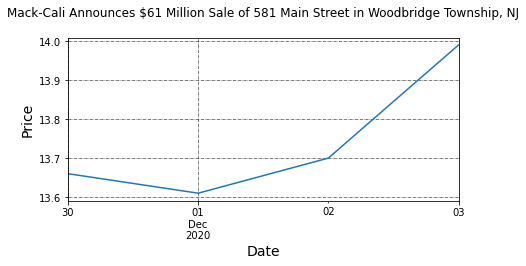

----------------------------------------------------------------------------------------------------
Present Stocks of  The J. M. Smucker Company (SJM)


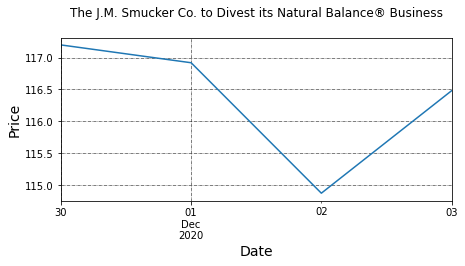

----------------------------------------------------------------------------------------------------
Present Stocks of  Pembina Pipeline Corporation (PBA)


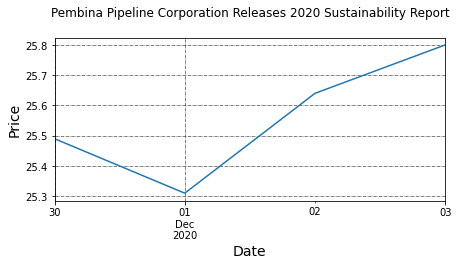

----------------------------------------------------------------------------------------------------
Present Stocks of  Carnival Corporation & Plc (CCL)


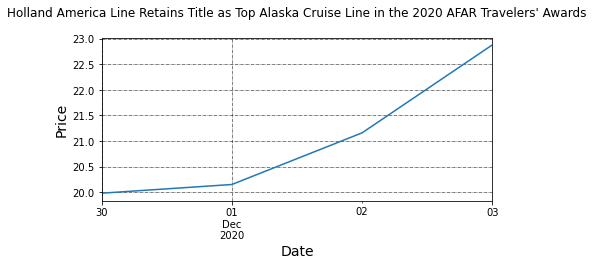

----------------------------------------------------------------------------------------------------
Present Stocks of  The Hanover Insurance Group, Inc. (THG)


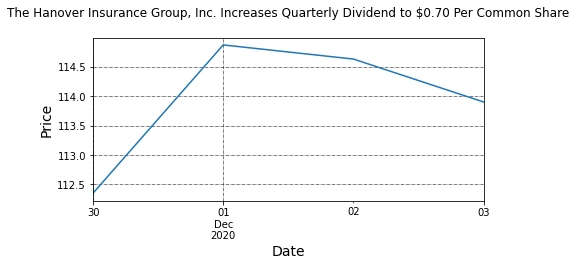

----------------------------------------------------------------------------------------------------


In [421]:
#Visualization showing the News headline and Stock prices of last 5 days for all the stock symbols 
for x,h,n in zip(stock_symbols,headline,company_name):
    all_data[x].Close.plot(figsize=(7, 3))
    # Define the label for the title of the figure
    plt.title(h)
    print("Present Stocks of ",n)
    # Define the labels for x-axis and y-axis
    plt.ylabel('Price', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    # Plot the grid lines
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
    plt.show()
    print("----------------------------------------------------------------------------------------------------")

##### Plotting visualization for multiple stocks

In [422]:
def ts_plot(X, xlabel='Time', ylabel='Observed Quantity', title='Time Series'):
    fig, ax = plt.subplots(figsize=(10, 5))
     # Add x-axis and y-axis
    for i, xi in enumerate(X):
        xi.plot(ax=ax, linestyle='solid')
  # Set title and labels for axes
        ax.set(xlabel=xlabel,ylabel=ylabel,title=title)
    if len(X) > 1: # more than one series
        ax.legend()
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
    plt.show()

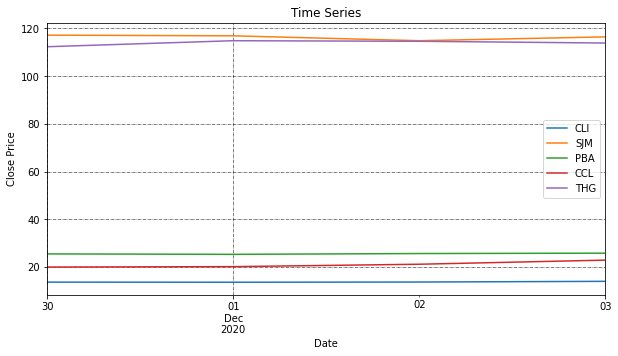

In [423]:
ts_plot([price],'Date','Close Price')

The above plot will not give us much insights because symbols has large price difference. To get the relative moment of the plots, the data is normalized so that graph is plotted on same scale as shown below

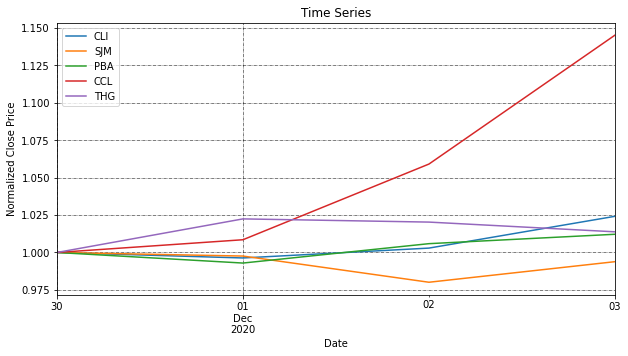

In [424]:
#Normalizing the price
norm_price=price/price.iloc[0,:]
ts_plot([norm_price],'Date','Normalized Close Price')

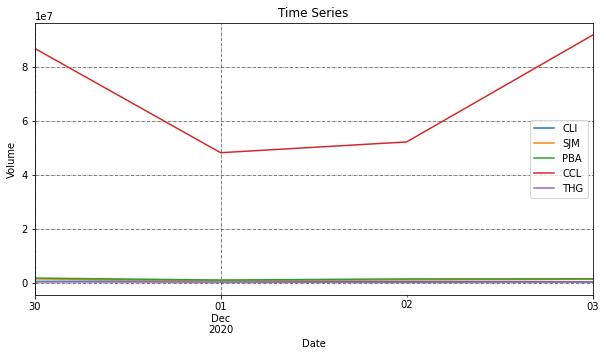

In [425]:
# Time series plot shows the Volume of the multiple stocks
ts_plot([volume],'Date','Volume')

The above plot will not give us much insights because symbols has large volume difference. To get the relative moment of the plots, the data is normalized so that graph is plotted on same scale as shown below

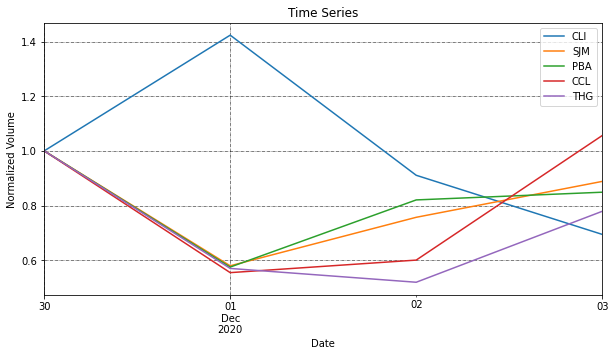

In [426]:
#To get the data in the same scaled, volume is also normalized to give better comparison of stock data
#Normalizing the volume
norm_volume=volume/volume.iloc[0,:]
ts_plot([norm_volume],'Date','Normalized Volume')

#### Conclusion
Thus, the stock symbols are fetched from the newswire website and their last 5 days stock data is collected from yahoo finance website. Finally, the time series plot is drawn individually for each stock symbol as well as together to compare the prices for multiple stocks on normalized scale.